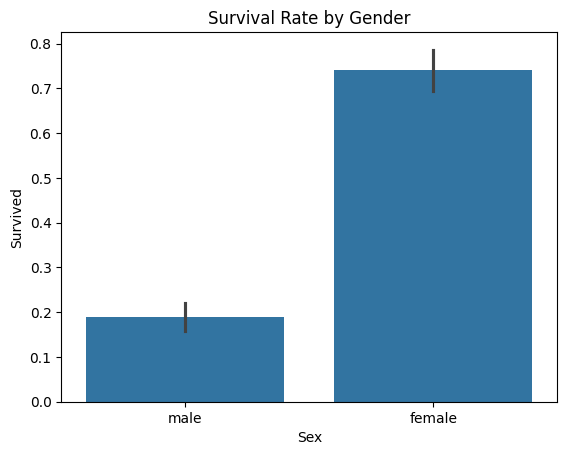

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# 1. Load dataset
df = pd.read_csv("S:/Sameet Patil - SEM 7/LP3/codes/train.csv")

# 2. Simple analysis plot (Survival vs Sex)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

# 3. Keep useful columns only
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

# 4. Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 5. Encode categorical columns
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])  # male=1, female=0
df["Embarked"] = le.fit_transform(df["Embarked"])

# 6. Features & target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 9. Predict
y_pred = model.predict(X_test)

# 10. Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)